# Import data

In [35]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Import tables
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Python_Final Project/'

df_retail = pd.read_excel(path + 'ecommerce retail.xlsx', sheet_name="ecommerce retail")
df_segment = pd.read_excel(path + 'ecommerce retail.xlsx', sheet_name="Segmentation")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Exploratory Data Analysis (EDA)
- The dataframe (retail) contains 541,909 rows and 8 columns.
- There are 135,080 missing values for CustomerID which is important for RFM analysis.
- There are negative values in Quantity and Unit Price columns, which is not logically valid.
- There are 5268 duplicated values.

In [38]:
# Check the general info
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [39]:
# Check for missing values
df_retail.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [40]:
# Check data summary
df_retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [41]:
# Check duplicates
df_retail.duplicated().sum()

np.int64(5268)

# Data Wrangling
- Convert to correct data types
- Remove missing values in CustomerID column.
- Remove incorrect data points in Quantity and Unit Price columns.
- Remove duplicated values.
- After wrangling, the dataset has 392,692 rows with no missing values, no duplicates and correct data points in Quantity and Unit Price columns.

In [42]:
# Adjust data types and remove missing values
column_list = ["InvoiceNo", "StockCode", "Description", "Country"]
for c in column_list:
    df_retail[c] = df_retail[c].astype(str)

df_retail = df_retail.dropna(subset=['CustomerID'])
df_retail["CustomerID"] = df_retail["CustomerID"].astype('Int64').astype(str)

df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [43]:
# Remove invalid data points
df_retail = df_retail [~df_retail ['InvoiceNo'].astype(str).str.startswith("C")]
df_retail = df_retail [df_retail ['Quantity'] > 0]
df_retail = df_retail [df_retail ['UnitPrice'] > 0]

df_retail.describe()

,Quantity,InvoiceDate,UnitPrice
count,397884.000000,397884,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488
min,1.000000,2010-12-01 08:26:00,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000
50%,6.000000,2011-07-31 14:39:00,1.950000
75%,12.000000,2011-10-20 14:33:00,3.750000
max,80995.000000,2011-12-09 12:50:00,8142.750000
std,179.331775,NaN,22.097877


In [44]:
# Remove duplicates
df_retail.drop_duplicates(inplace=True)
df_retail.duplicated().sum()

np.int64(0)

In [45]:
# Check df after wrangling data
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  object        
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.0+ MB


# RFM Score & Segment

In [46]:
# Set current date = 2011-12-31
current_date = pd.to_datetime('2011-12-31')

In [47]:
# Calculate Amount = Quantity * UnitPrice
df_retail['Amount'] = df_retail['Quantity'] * df_retail['UnitPrice']
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [48]:
# Create df_RFM
df_RFM = df_retail.groupby('CustomerID').agg(Recency=('InvoiceDate', lambda x: (current_date - x.max()).days),  # Calculate the number of days since the last purchase
                                             Frequency=('InvoiceNo', 'nunique'),  # Count the number of transactions per customer
                                             Monetary=('Amount', 'sum')  # Sum the total revenue per customer
                                             ).reset_index()
df_RFM

,CustomerID,Recency,Frequency,Monetary
0,12346,346,1,77183.60
1,12347,23,7,4310.00
2,12348,96,4,1797.24
3,12349,39,1,1757.55
4,12350,331,1,334.40
...,...,...,...,...
4333,18280,298,1,180.60
4334,18281,201,1,80.82
4335,18282,28,2,178.05
4336,18283,24,16,2045.53


In [49]:
# R Score (lower Recency → higher score)
df_RFM['R_Score'] = pd.qcut(df_RFM['Recency'].rank(method='first'), 5, labels=[5, 4, 3, 2, 1], duplicates='drop').astype(int)

# F Score (higher Frequency → higher score)
df_RFM['F_Score'] = pd.qcut(df_RFM['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5], duplicates='drop').astype(int)

# M Score (higher Monetary → higher score)
df_RFM['M_Score'] = pd.qcut(df_RFM['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5], duplicates='drop').astype(int)

# Combined RFM Score
df_RFM['RFM_Score'] = (df_RFM['R_Score'].astype(str) +
                       df_RFM['F_Score'].astype(str) +
                       df_RFM['M_Score'].astype(str)
                      )
df_RFM

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346,346,1,77183.60,1,1,5,115
1,12347,23,7,4310.00,5,5,5,555
2,12348,96,4,1797.24,2,4,4,244
3,12349,39,1,1757.55,4,1,4,414
4,12350,331,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...
4333,18280,298,1,180.60,1,2,1,121
4334,18281,201,1,80.82,1,2,1,121
4335,18282,28,2,178.05,5,3,1,531
4336,18283,24,16,2045.53,5,5,4,554


In [50]:
# Flatten df_segment by splitting the 'RFM Score' column
df_segment['RFM Score'] = df_segment['RFM Score'].astype(str).str.split(',')
df_segment = df_segment.explode('RFM Score').reset_index(drop=True)

# Trim spaces in the 'RFM Score' column to ensure proper merging
df_segment['RFM Score'] = df_segment['RFM Score'].str.strip()

# Merge df_RFM with df_segment on the 'RFM Score'
df_RFM = pd.merge(df_RFM, df_segment, how='left', left_on='RFM_Score', right_on='RFM Score')
df_RFM = df_RFM.drop(columns=['RFM Score'])

df_RFM

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346,346,1,77183.60,1,1,5,115,Cannot Lose Them
1,12347,23,7,4310.00,5,5,5,555,Champions
2,12348,96,4,1797.24,2,4,4,244,At Risk
3,12349,39,1,1757.55,4,1,4,414,Promising
4,12350,331,1,334.40,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...
4333,18280,298,1,180.60,1,2,1,121,Lost customers
4334,18281,201,1,80.82,1,2,1,121,Lost customers
4335,18282,28,2,178.05,5,3,1,531,Potential Loyalist
4336,18283,24,16,2045.53,5,5,4,554,Champions


# Visualizations & Key Insights

In [61]:
!pip install squarify
import squarify

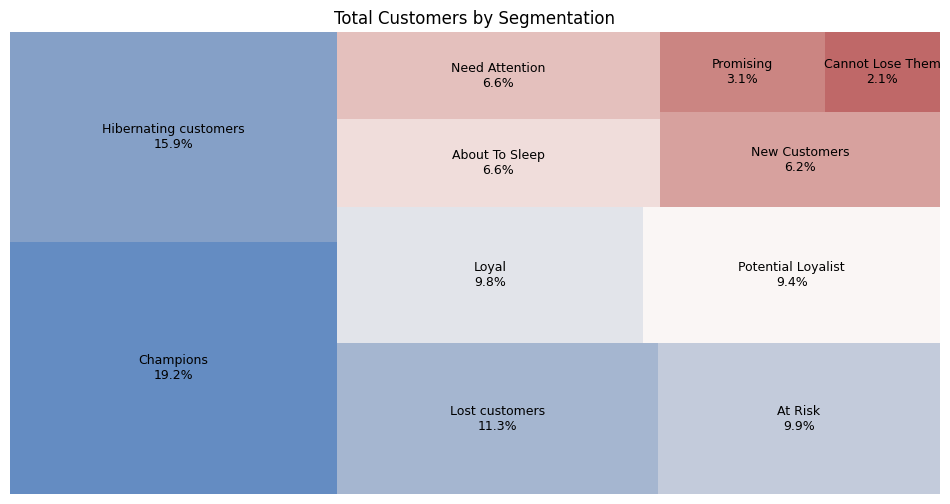

In [62]:
# Total Customers by Customer Segmentation
# prepare data
df_count = df_RFM['Segment'].value_counts().reset_index()
df_count.columns = ['Segment', 'Count']
df_count['Percent'] = (df_count['Count'] / df_count['Count'].sum()) * 100
df_count['Label'] = df_count['Segment'] + "\n" + df_count['Percent'].round(1).astype(str) + "%"

colors = sns.color_palette("vlag", n_colors=len(df_count))

plt.figure(figsize=(12,6))

squarify.plot(
    sizes=df_count['Count'],
    label=df_count['Label'],
    color=colors,
    alpha=0.9,
    text_kwargs={'fontsize': 9}
)

plt.title("Total Customers by Segmentation")
plt.axis('off')
plt.show()

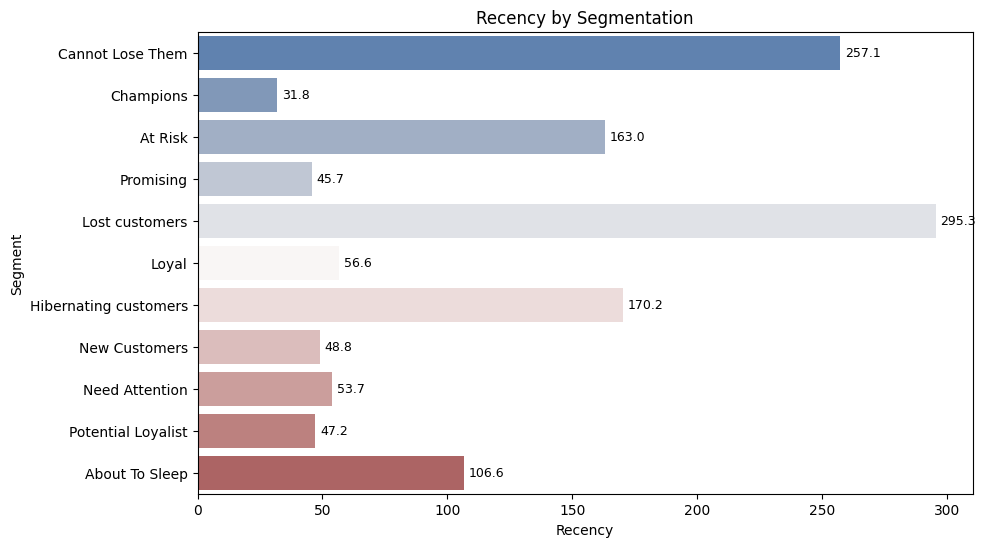

In [58]:
# Recency by Segmentation
plt.figure(figsize=(10,6))

ax = sns.barplot(data=df_RFM, y="Segment", x="Recency", orient="h", hue="Segment", palette = "vlag", legend=False, errorbar = None)

# Add data label
for p in ax.patches:
    value = p.get_width()
    ax.text(
        value + 2,                    # đẩy text lệch sang phải 1 chút
        p.get_y() + p.get_height()/2,
        f"{value:.1f}",
        va='center',
        fontsize=9,
        color='black'
    )

plt.title("Recency by Segmentation")
plt.show()

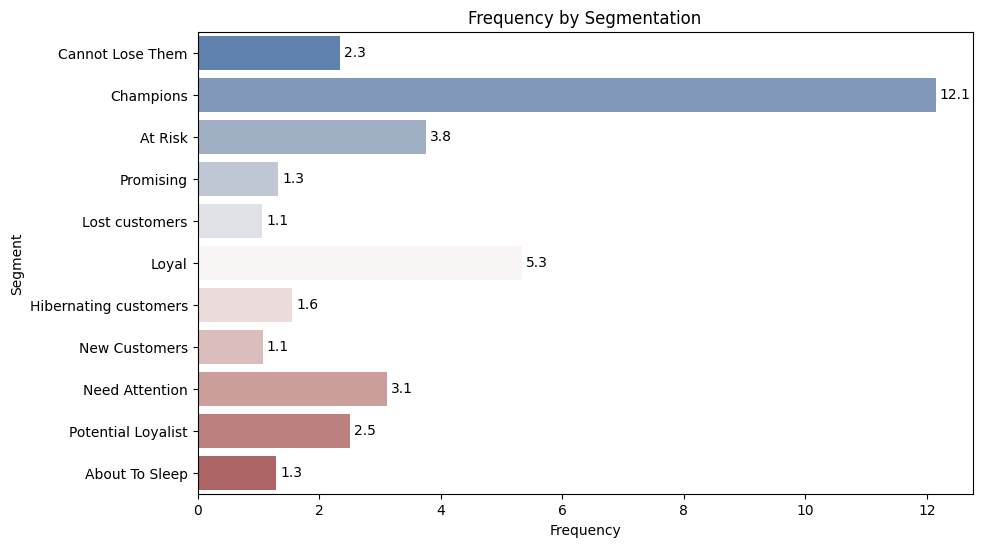

In [59]:
# Frequency by Segmentation
plt.figure(figsize=(10,6))

ax2 = sns.barplot(data=df_RFM, y="Segment", x="Frequency", orient="h", hue="Segment", palette = "vlag", legend=False, errorbar = None)

# Add data label
for container in ax2.containers:
    ax2.bar_label(
        container,
        fmt="%.1f",         # định dạng số
        padding=3,          # cách bar 3px
        fontsize=10
    )

plt.title("Frequency by Segmentation")
plt.show()

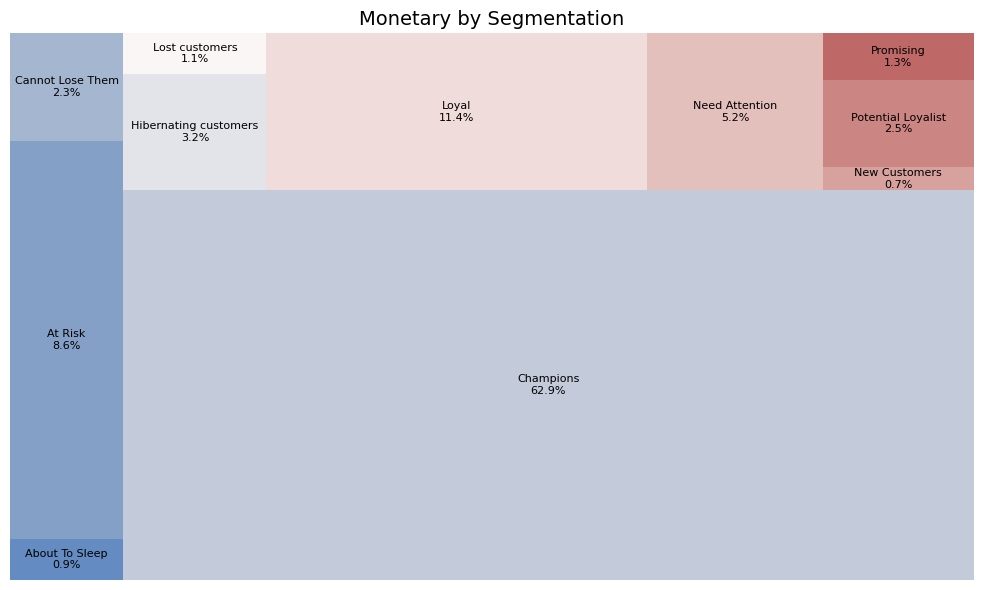

In [60]:
# Monetary by Segmentation
df_plot = df_RFM.groupby("Segment", as_index=False)["Monetary"].sum()

# Calculate %Monetary
total = df_plot["Monetary"].sum()
df_plot["Percent"] = df_plot["Monetary"] / total * 100

# Add data label: Segment + Monetary + %
df_plot["Label"] = df_plot.apply(
    lambda row: f"{row['Segment']}\n{row['Percent']:.1f}%",
    axis=1
)

plt.figure(figsize=(10, 6))

squarify.plot(
    sizes=df_plot["Monetary"],
    label=df_plot["Label"],
    color=colors,
    alpha=0.9,
    text_kwargs={"fontsize":8}
)

plt.title("Monetary by Segmentation", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()

In [63]:
df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])
df_retail['Year'] = df_retail['InvoiceDate'].dt.year
df_retail['Month'] = df_retail['InvoiceDate'].dt.to_period('M')

df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010-12


In [64]:
df_cust_month = df_retail.groupby(['CustomerID', 'Month']).agg(
    Total_Sales = ('Amount', 'sum'),
    Order_Count = ('InvoiceNo', 'nunique')
).reset_index()

df_cust_month

,CustomerID,Month,Total_Sales,Order_Count
0,12346,2011-01,77183.60,1
1,12347,2010-12,711.79,1
2,12347,2011-01,475.39,1
3,12347,2011-04,636.25,1
4,12347,2011-06,382.52,1
...,...,...,...,...
13049,18283,2011-10,112.99,1
13050,18283,2011-11,637.71,4
13051,18283,2011-12,208.00,1
13052,18287,2011-05,765.28,1


In [65]:
df_RFM_time = df_RFM.merge(df_cust_month, on='CustomerID', how='left')
df_RFM_time

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,Month,Total_Sales,Order_Count
0,12346,346,1,77183.60,1,1,5,115,Cannot Lose Them,2011-01,77183.60,1
1,12347,23,7,4310.00,5,5,5,555,Champions,2010-12,711.79,1
2,12347,23,7,4310.00,5,5,5,555,Champions,2011-01,475.39,1
3,12347,23,7,4310.00,5,5,5,555,Champions,2011-04,636.25,1
4,12347,23,7,4310.00,5,5,5,555,Champions,2011-06,382.52,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13049,18283,24,16,2045.53,5,5,4,554,Champions,2011-10,112.99,1
13050,18283,24,16,2045.53,5,5,4,554,Champions,2011-11,637.71,4
13051,18283,24,16,2045.53,5,5,4,554,Champions,2011-12,208.00,1
13052,18287,63,3,1837.28,3,4,4,344,Loyal,2011-05,765.28,1


In [66]:
freq_monthly_seg = df_RFM_time.groupby(['Month','Segment'], as_index=False).agg(
    Total_Sales = ('Total_Sales', 'sum'),
    Total_Orders = ('Order_Count', 'sum')
)
freq_monthly_seg

,Month,Segment,Total_Sales,Total_Orders
0,2010-12,About To Sleep,737.57,8
1,2010-12,At Risk,60227.49,151
2,2010-12,Cannot Lose Them,20062.81,65
3,2010-12,Champions,380395.69,787
4,2010-12,Hibernating customers,22198.86,88
...,...,...,...,...
120,2011-12,Loyal,6460.46,35
121,2011-12,Need Attention,181475.38,29
122,2011-12,New Customers,5376.68,21
123,2011-12,Potential Loyalist,13426.53,78


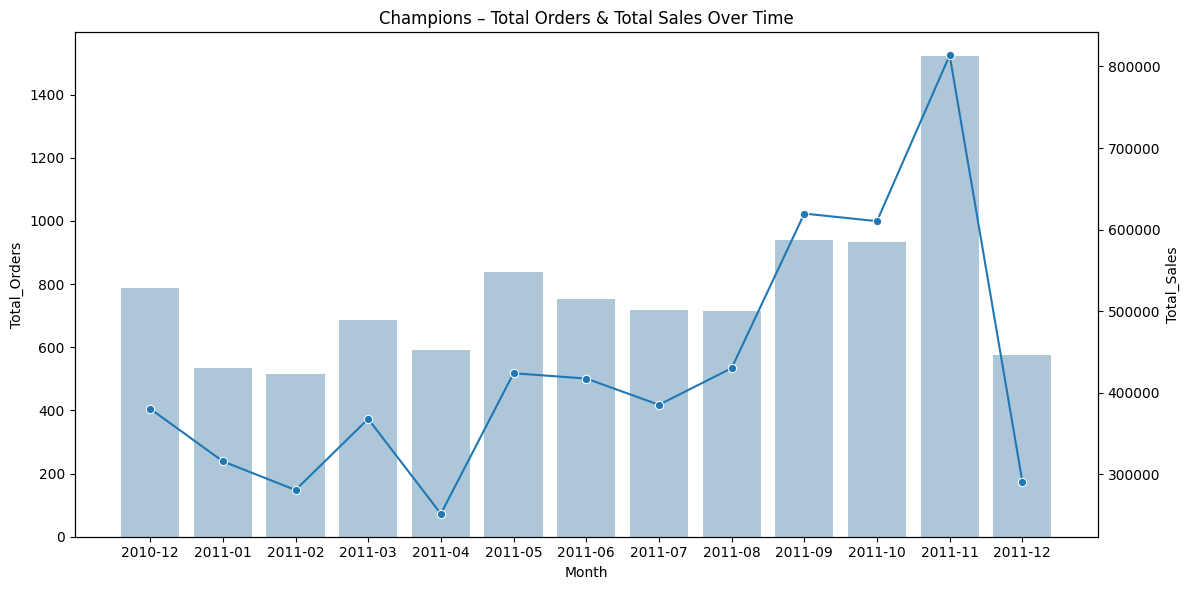

In [67]:
plt.figure(figsize=(12,6))

# Convert Month to string for plotting
freq_monthly_seg['Month'] = freq_monthly_seg['Month'].astype(str)

df_champions = freq_monthly_seg[freq_monthly_seg['Segment'] == 'Champions']
df_hibernate = freq_monthly_seg[freq_monthly_seg['Segment'] == 'Hibernating customers']

# Bar chart cho Total Orders
sns.barplot(data=df_champions, x='Month', y='Total_Orders', errorbar=None, alpha=0.4)

# Line chart cho Total Sales
ax3 = plt.twinx()
sns.lineplot(data=df_champions, x='Month', y='Total_Sales', errorbar=None, marker='o', ax=ax3)

plt.title("Champions – Total Orders & Total Sales Over Time")
plt.tight_layout()
plt.show()

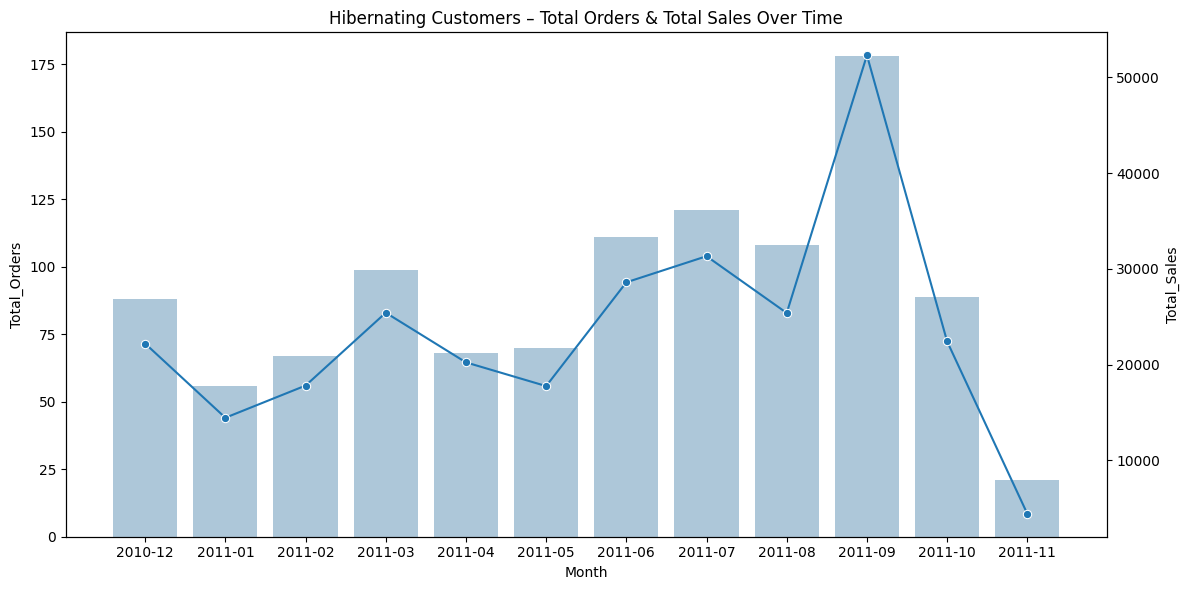

In [68]:
plt.figure(figsize=(12,6))

# Bar chart cho Total Orders
sns.barplot(data=df_hibernate, x='Month', y='Total_Orders', errorbar=None, alpha=0.4)

# Line chart cho Total Sales
ax4 = plt.twinx()
sns.lineplot(data=df_hibernate, x='Month', y='Total_Sales', errorbar=None, marker='o', ax=ax4)

plt.title("Hibernating Customers – Total Orders & Total Sales Over Time")
plt.tight_layout()
plt.show()

## Key Insights
### Customer base composition (Total Customers by Segmentation)
- There is a strong core of Champions (19.2%) and a large block of Hibernating (15.9%), plus meaningful shares of Loyal, Lost, At Risk, Potential Loyalist, etc. The revenue distribution is highly skewed: Champions drive ~63% of total monetary while many segments contribute little individually.

### Recency picture
- Several segments show poor recency (Lost ~295 days), At Risk and Hibernating have long gaps, while Champions and some Potential Loyalists show recent activity. Recency separates “ready-to-buy” customers from those needing reactivation.

### Frequency picture
- Champions have very high frequency (12.1), Loyal are moderate, most other segments show low frequency — indicating either low repeat purchase behavior or one-off buyers in many segments.

### Monetary picture
- Champions dominate monetary share. Some segments with moderate frequency (Loyal, Potential Loyalist) have decent monetary share potential. Hibernating and Lost are low monetary but can be cost-effective to reactivate.

### Two segments with the highest proportion of customers
- **Champions**

  Champions produce the bulk of orders and sales but show high month-to-month volatility (huge spikes in Nov, crash in Dec). This suggests Champions respond strongly to seasonal events / major campaigns. Their behavior is high-value but campaign-driven.

- **Hibernating**

  Hibernating customers show mostly low activity but spike when strong incentives or campaigns run (e.g., strong activation in Sep). They are responsive but require a clear trigger to purchase.

- SuperStore has a high-value, campaign-sensitive Champion core and a sizable pool of awakenable Hibernating customers. Recency is the clearest signal of near-term purchase propensity; frequency & monetary help prioritize investment but are more variable and campaign-dependent.

# Recommendations

### Champions (protect & stabilize)
- Goal: Reduce revenue volatility and increase lifetime value further.
- Tactics:
  - Tier-based VIP program (early access, exclusive bundles, personalized concierge).
  - Predictive replenishment / subscription offers for frequently bought SKUs.
  - Personalization: curated collections via email and on-site homepage.
  - Soft win-back: invite to VIP-only flash events (keeps them buying outside big spikes).
- Channels: Email (highly personalized), push, dedicated paid social lookalike campaigns to find similar high-LTV prospects.
- KPIs: share of revenue from Champions (stabilize month-to-month), repeat rate within 30 days, churn rate among Champions.

### Hibernating Customers (cheap reactivation)
- Goal: Move them back to Active with minimal CAC.
- Tactics:
  - Micro-conversion campaign: trigger 1–3 step offers (free shipping + small money-off) tied to recent catalog updates.
  - Win-back sequence: 3-touch email/SMS within 14 days with progressively stronger incentives; include “you left items / new version of an item you bought.”
  - Time-limited bundles for prior categories they purchased.
- Channels: Email, SMS, owned push, remarketing (dynamic ads).
- KPIs: reactivation rate (purchase in 30 days), CAAV (cost per activated customer), average order value post-reactivation.

### At Risk & About-to-Sleep (prevent churn)
- Goal: Stop drift before they leave.
- Tactics:
  - Behavioral triggers: if no purchase in X days after historically normal cadence → immediate personalized incentive.
  - Small surveys on exit intent + friction reduction (returns policy, price match).
  - Sweeten next purchase with loyalty points multiplier.
- Channels: Email + onsite banners + cart/UX nudges.
- KPIs: reduction in churn rate, conversion of triggered campaigns, survey NPS.

### Potential Loyalists & Promising (scale mid-LTV)
- Goal: Convert to Loyal/Champion.
- Tactics:
  - Onboarding flows after the first purchase (educational content, quick uses, cross-sell).
  - 2nd-purchase incentive (meaningful but small, e.g., 15% off second order).
  - Social proof + product bundles targeted to their first-buy category.
- Channels: Email automation, in-app messages, retargeting.
- KPIs: 2nd-purchase rate, time between 1st and 2nd purchase, frequency uplift.

### Lost Customers (low priority reactivation)
- Goal: Low-cost experiments only.
- Tactics:
  - Quarterly “re-discovery” campaigns highlighting major changes (new categories) and strong offers.
  - Use lookalike audiences to find similar paying users rather than over-investing in reactivation.
- KPIs: activation per campaign spent, cost per reactivated customer.

## Which RFM metric should Marketing & Sales prioritize?
- **Marketing — Prioritize Recency (R)**

  Reason: In your dataset, Recency is the strongest near-term predictor of purchase behavior (Champions & Potential Loyalists show high recency; Hibernating respond when re-engaged). Recency-based targeting yields the best conversion efficiency and lowest CAC on reactivation. Use R to drive campaign timing and personalization.

- **Sales — Prioritize Monetary (M)** (with Recency as a secondary filter)

  Reason: Sales’ remit is revenue maximization and higher-ticket conversion. Targeting customers with high historical monetary value (and acceptable recency) yields better ROI for one-on-one or B2B-style selling approaches.

- Frequency (F) is important as a supporting metric: use it to identify repeat-buy patterns (ideal for subscription offers) and to segment mid-LTV cohorts. But as the single highest-priority metric for operational campaign targeting, R > M > F for Marketing; M > R > F for Sales.